## demystfying data science KNN/SVM algorithms



In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.DataFrame(np.random.rand(4,5),index=['A','B','C','D'])

In [8]:
df

,0,1,2,3,4
A,0.959512,0.565279,0.385898,0.330491,0.582127
B,0.556480,0.872782,0.612480,0.967728,0.972918
C,0.331931,0.398542,0.009318,0.344949,0.790256
D,0.264806,0.850186,0.960105,0.438520,0.895701


In [14]:
tips = sns.load_dataset("tips")

In [23]:
#sns can make jointplot and pairplot boxplot
sns.boxplot(x='day',y='y',data=tips)

ValueError: Could not interpret input 'y'

In [20]:
customers = pd.read_csv('http://datasets.coso.io/public/Car_Customers.csv')

In [21]:
customers.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## KNN section

In [24]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


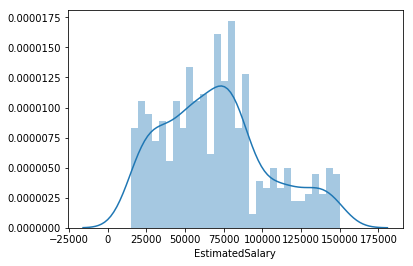

In [25]:
sns.distplot(customers['EstimatedSalary'],bins=30)

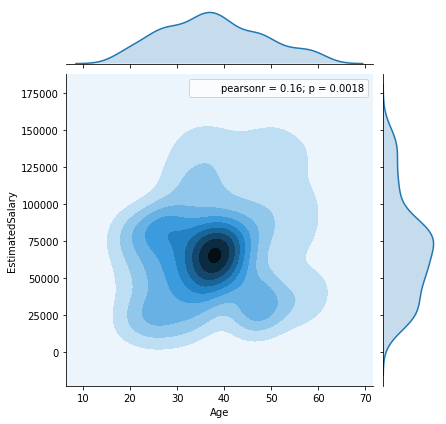

In [26]:
sns.jointplot('Age','EstimatedSalary',data=customers,kind='kde')

ValueError: bus1 is not a valid palette name

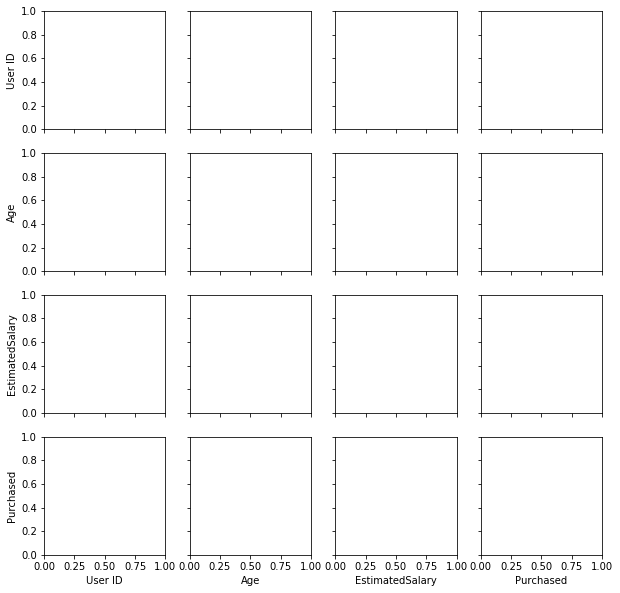

In [28]:
sns.pairplot(customers,palette='bus1',hue='Purchased')

## train test split

In [29]:
x = customers.iloc[:,[2,3]].values
y = customers.iloc[:,4].values

In [30]:
#splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

## standardise the variables
##### bec the KNN classifier predicts the class of a given test observation by IDing the obsr that are neartest to it, the scale of the vars mattters, any vars that are on a large scale will have a muh larger effect on teh distance bt the obsr and hence on the KNN classifier than vars that are on a small scale

In [32]:
# fitting KNN to the traiing set
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)

In [34]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Predictions and evals

In [35]:
predictions = knn.predict(X_test)

In [36]:
#making the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
#interpret if overfitted

[[54  9]
 [10 27]]


             precision    recall  f1-score   support

          0       0.84      0.86      0.85        63
          1       0.75      0.73      0.74        37

avg / total       0.81      0.81      0.81       100



In [ ]:
## choosing a K value
err_rate = []

#will take some time
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
        


## support vector machines

In [41]:
from sklearn.svm import SVC

In [43]:
model = SVC(kernel = 'linear', random_state=0)
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
predictions=model.predict(X_train)

In [ ]:
#changing kernel will change the way the function covers the data (dots) and accuracy will change (better or worse)